In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from glob import glob

In [ ]:
def load_images():
    train_images = [] 
    train_labels = []
    # Loop over the training folder 
    for classed in range(10):
        print('Loading directory c{}'.format(classed))
        path = os.path.join('data', 'imgs', 'train', 'c' + str(classed), '*.jpg')
        files = glob(path)
        for file in files:
            img = cv2.imread(file)
            train_images.append(cv2.resize(img, (225,225)))
            train_labels.append(classed)  
    print(len(train_images))        
    return train_images, train_labels 


images, labels = load_images()

Loading directory c0
Loading directory c1
Loading directory c2
Loading directory c3
Loading directory c4
Loading directory c5
Loading directory c6
Loading directory c7
Loading directory c8
Loading directory c9
22424


In [3]:
data_file = pd.read_csv("data/driver_imgs_list.csv")
data_file

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


In [4]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [5]:
x_train, x_test, y_train, y_test =  train_test_split(images,labels, test_size = 0.25)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
x_train, y_train = np.asarray(x_train), np.asarray(y_train)
x_test, y_test = np.asarray(x_test), np.asarray(y_test)
print(x_train.shape, y_train.shape)

(16818, 225, 225, 3) (16818, 10)


In [7]:
print('Unique drivers: ', data_file['subject'].nunique())
print('Number of images per driver')
print(data_file['subject'].value_counts())

Unique drivers:  26
Number of images per driver
subject
p021    1237
p022    1233
p024    1226
p026    1196
p016    1078
p066    1034
p049    1011
p051     920
p014     876
p015     875
p035     848
p047     835
p081     823
p012     823
p064     820
p075     814
p061     809
p056     794
p050     790
p052     740
p002     725
p045     724
p039     651
p041     605
p042     591
p072     346
Name: count, dtype: int64


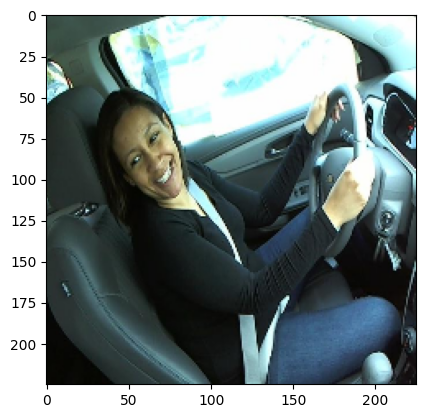

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(x_train[800], cv2.COLOR_BGR2RGB))
plt.show()
print(y_train[800])

In [9]:
## implementing CNN model for Image processing

In [10]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop
import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
model = Sequential()

size = 16
#starting size with 32
model.add(Conv2D(size*2, (3, 3), padding='same', input_shape=(225,225,3)))
model.add(Activation('elu'))
model.add(Conv2D(size*2, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#starting size with 32*2 = 64

model.add(Conv2D(size*4, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(size*4, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#starting size with 32*2*4 = 128

model.add(Conv2D(size*8, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(size*8, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


In [13]:
model.add(Flatten())
model.add(Dense(size*16))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))#softmax is used to get maximun value in a row

In [14]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop()

In [15]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 225, 225, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 225, 225, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 223, 223, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 223, 223, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 111, 111, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 54, 54, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 22,441,002 (85.61 MB)

 Trainable params: 22,441,002 (85.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint_path = "checkpoints.h5"
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,  # Only save the best (lowest val_loss) model
    verbose=1
)
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=2, verbose=1)

# Train the model with both callbacks
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=25,
    callbacks=[early_stop, checkpoint]
)

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=10)